<IPython.core.display.Javascript object>


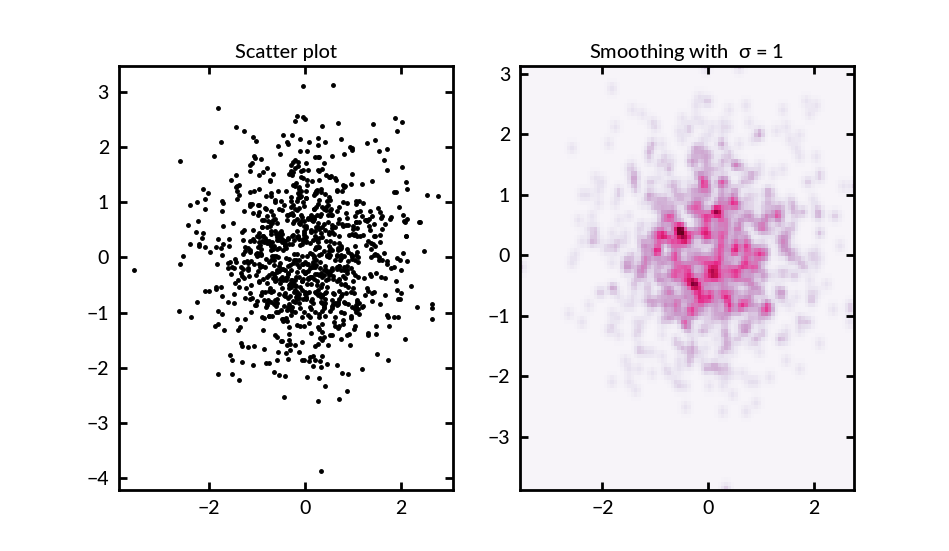

In [49]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter

def mk_heatmap(x, y, s, bins=1000):
    ''' Creates a smoothed heatmap given a large set of x,y positions.
    
    x, y -- the data
    s -- the sigma or the number of pixels overwhich to smooth the data
    bins -- the total number of bins across the x and y axes in the image
    
    Returns:
    The smoothed heatmap image
    The image's extent (useful for plotting)
    The bins along the x axis
    The bins along the y axis
    
    '''
    
    
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins, range=[[x.min(), x.max()], [y.min(), y.max()]])
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent, xedges, yedges

def value_heatmap(x, y, xbins, ybins, heatmap):
    ''' Calculates the smoothed value of the heatmap at the given x,y position
    
    x, y -- position to measure the heatmap
    xbins -- the heatmap x bins
    ybins -- the heatmap y bins
    heatmap -- the values of the heatmap
    
    Returns:
    The heatmap's value at the given x, y position.
    
    '''


    xbin = np.digitize(x, xbins[1: -1])
    ybin = np.digitize(y, ybins[1: -1])

    return heatmap[ybin][xbin]

fig, axs = plt.subplots(1, 2)

# Generate some test data
np.random.seed(1234)
x = np.random.randn(1000)
y = np.random.randn(1000)

sigmas = [0, 1]

for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.plot(x, y, 'k.', markersize=5)
        ax.set_title("Scatter plot")
    else:
        img, extent, xedges, yedges = mk_heatmap(x, y, s, bins=100)
        ax.imshow(img, extent=extent, origin='lower', cmap=cm.PuRd)
        ax.set_title("Smoothing with  $\sigma$ = %d" % s)

In [50]:
import pandas as pd

In [121]:
df = pd.read_csv('./data/inspections.csv')

In [55]:
df.inspection_date = pd.to_datetime(df.inspection_date)

In [52]:
df.latitude.replace(0, np.nan, inplace=True)

In [53]:
df.longitude.replace(0, np.nan, inplace=True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236073 entries, 0 to 236072
Data columns (total 15 columns):
camis                    236073 non-null int64
dba                      236073 non-null object
boro                     236073 non-null object
zipcode                  232526 non-null float64
cuisine_description      236073 non-null object
inspection_date          236073 non-null object
action                   236073 non-null object
violation_code           233083 non-null object
violation_description    231475 non-null object
critical_flag            231475 non-null object
score                    225856 non-null float64
grade                    119906 non-null object
inspection_type          236073 non-null object
latitude                 235825 non-null float64
longitude                235825 non-null float64
dtypes: float64(4), int64(1), object(10)
memory usage: 27.0+ MB


In [57]:
df.describe()

,zipcode,score,latitude,longitude
count,233478.000000,226778.000000,233230.000000,233230.000000
mean,10668.861700,19.406697,40.728237,-73.944382
std,595.889926,13.943656,0.068266,0.074977
min,10000.000000,-1.000000,40.508069,-74.248416
25%,10022.000000,11.000000,40.687773,-73.989646
50%,10467.000000,14.000000,40.733840,-73.960632
75%,11226.000000,25.000000,40.762035,-73.904214
max,12345.000000,151.000000,40.912822,-73.700928


In [122]:
df.grade.value_counts()

A    97286
B    15496
C     5335
P     1732
N       43
Z        9
G        5
Name: grade, dtype: int64

In [123]:
df[['inspection_type', 'grade', 'score']].head(20)

,inspection_type,grade,score
0,Cycle Inspection / Re-inspection,A,6.0
1,Cycle Inspection / Initial Inspection,A,9.0
2,Cycle Inspection / Initial Inspection,A,7.0
3,Cycle Inspection / Initial Inspection,NaN,17.0
4,Cycle Inspection / Initial Inspection,NaN,17.0
5,Cycle Inspection / Initial Inspection,A,9.0
6,Cycle Inspection / Initial Inspection,NaN,17.0
7,Cycle Inspection / Initial Inspection,A,7.0
8,Cycle Inspection / Re-inspection,A,13.0
9,Cycle Inspection / Re-inspection,A,13.0


In [110]:
# Function that maps the P and Z grade to correct A, B or C grade
def grades_change(y):
    grade_list = ['A','B','C']
    if (y.grade in grade_list):
        return y.grade
    elif (y.grade == 'P') | (y.grade == 'Z'):
        if (y.score >= 0) & (y.score <= 13):
            return 'A'
        elif (y.score >= 14) & (y. score <= 27):
            return 'B'
        else:
            return 'C'

In [114]:
df.grade = df.apply(grades_change, axis=1)

In [115]:
df.grade.value_counts()

A    99289
B    15696
C     5354
Name: grade, dtype: int64

<IPython.core.display.Javascript object>


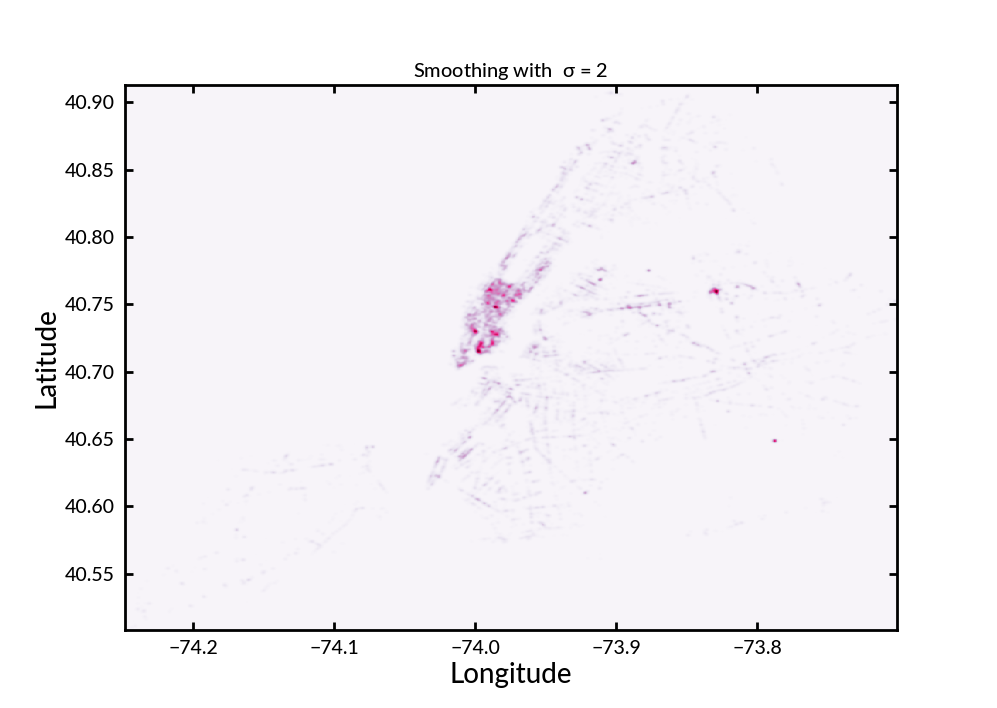

In [48]:
fig, ax = plt.subplots(1,1)

x = df.longitude
y = df.latitude

sigmas = 1
s = 2

img, extent, xedges, yedges = myplot(x, y, s)
ax.imshow(img, extent=extent, origin='lower', cmap=cm.PuRd)
ax.set_title("Smoothing with  $\sigma$ = %d" % s)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

In [85]:
index = pd.DatetimeIndex(freq='W', start=df.inspection_date.min(), end=df.inspection_date.max())
# tweets = [random.choice( for _ in range(len(index))]
time_df = pd.DataFrame(index=index, data=df.critical_flag, columns=['critical_flag'])
time_df['day'] = time_df.index.date
time_df['count'] = 1

/home/boada/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  """Entry point for launching an IPython kernel.


In [116]:
code_map = {
    '02':'FOOD TEMPERATURE',
    '03':'FOOD SOURCE',
    '04':'PERSONAL HYGIENE/FOOD PROTECTION',
    '05':'FACILITY DESIGN',
    '06':'PERSONAL HYGIENE/FOOD PROTECTION',
    '08':'VERMIN/GARBAGE',
    '09':'FACILITY MAINTENANCE',
    '10':'FACILITY DESIGN',
    '07':'OTHER',
    '20':'LETTER GRADE CARD/OTHER POSTER ABSENT',
    '16':'MENU DESCRIPTION IMPROPER',
    '22':'OTHER',
    '15':'NO SMOKING POLICY',
    '18':'OTHER',
    'na':'NONE' 
}



In [136]:
df[['violation_code', 'violation_description']][df.violation_code == '16F'].iloc[0]['violation_description']

'Specific caloric content or range thereof not posted on menus, menu boards or food tags for each menu item offered as a combination meal with multiple options that are listed as single items.'

In [128]:
df.violation_code.unique()

array(['04L', '10F', '06C', '04C', '10B', '04H', '02B', '09C', '06D',
       '02G', '08A', '04M', '04A', '04N', '10J', '06F', '20D', '22A',
       '06E', '06A', '04J', '05D', '04K', '10H', '10E', '15L', '02H',
       '22C', '15I', '10I', '09B', '06B', nan, '22F', '20F', '10D', '09A',
       '16B', '05H', '08C', '10A', '15K', '15J', '05B', '03B', '04O',
       '10C', '15S', '08B', '03A', '02A', '16C', '02D', '02C', '05A',
       '22E', '06G', '16A', '18F', '02I', '04F', '05F', '04E', '20A',
       '04D', '05E', '05C', '07A', '22B', '18D', '03C', '16E', '20E',
       '16F', '18C', '10G', '06I', '06H', '04B', '15T', '03F', '03D',
       '03E', '02E', '15F6', '15E3', '15F7', '15F1', '15E2', '15A1',
       '16D', '15F2', '15F8', '18B', '04G', '17A1', '02F', '19A3', '02J',
       '17A3', '04I', '03G', '18G'], dtype=object)

In [83]:
daily_counts = time_df.groupby(by=['critical_flag', 'day']).count()
daily_counts_xtab = daily_counts.unstack(level='critical_flag')['count']
print(daily_counts_xtab.head(20))
daily_counts_xtab.plot()

KeyError: 'count'

<IPython.core.display.Javascript object>


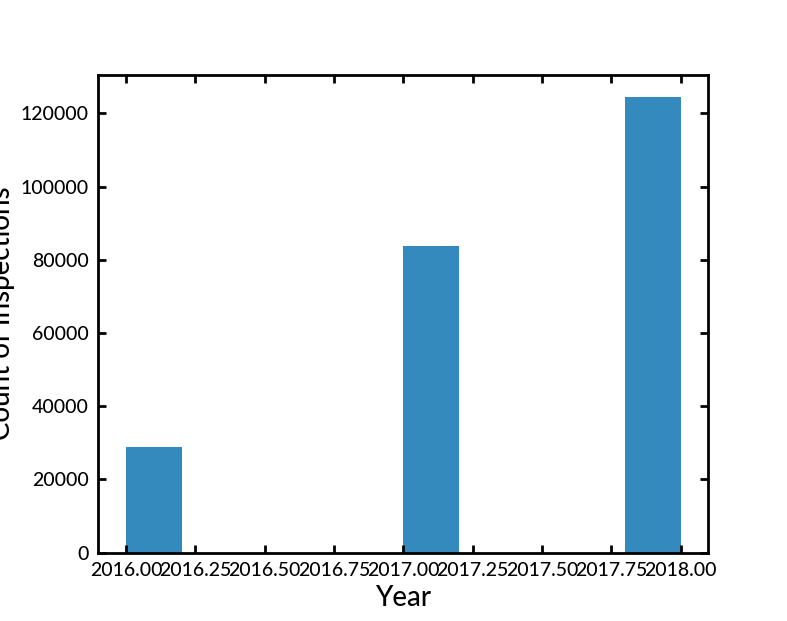

Text(0, 0.5, 'Count of Inspections')

In [80]:
year_hist = pd.to_datetime(df["inspection_date"]).dt.year
#year_hist = year_hist.value_counts().sort_index()

plt.hist(year_hist)

# plt.bar(year_hist.index, year_hist.values)
plt.xlabel("Year")
plt.ylabel("Count of Inspections")

<IPython.core.display.Javascript object>


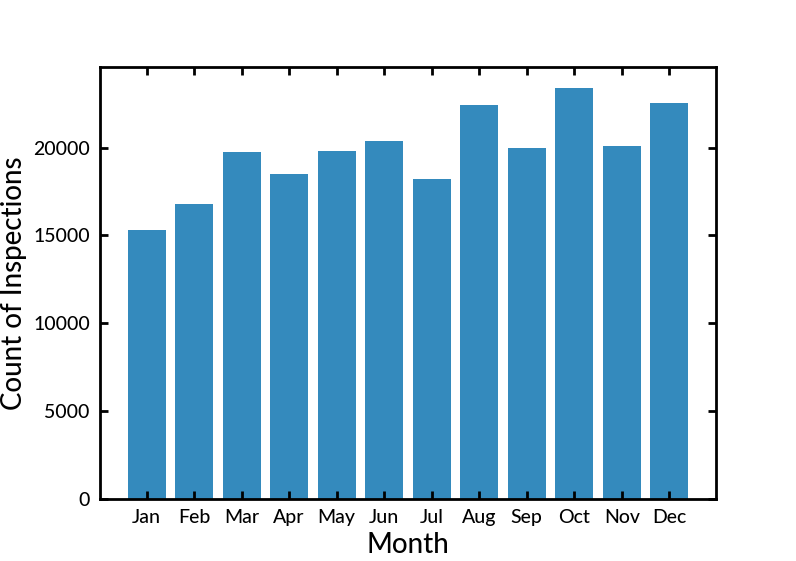

In [81]:
month_hist = pd.to_datetime(df["inspection_date"]).dt.month
month_hist = month_hist.value_counts().sort_index()
month_hist.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.bar(month_hist.index, month_hist.values)
plt.xlabel("Month")
plt.ylabel("Count of Inspections")
plt.show()

<IPython.core.display.Javascript object>


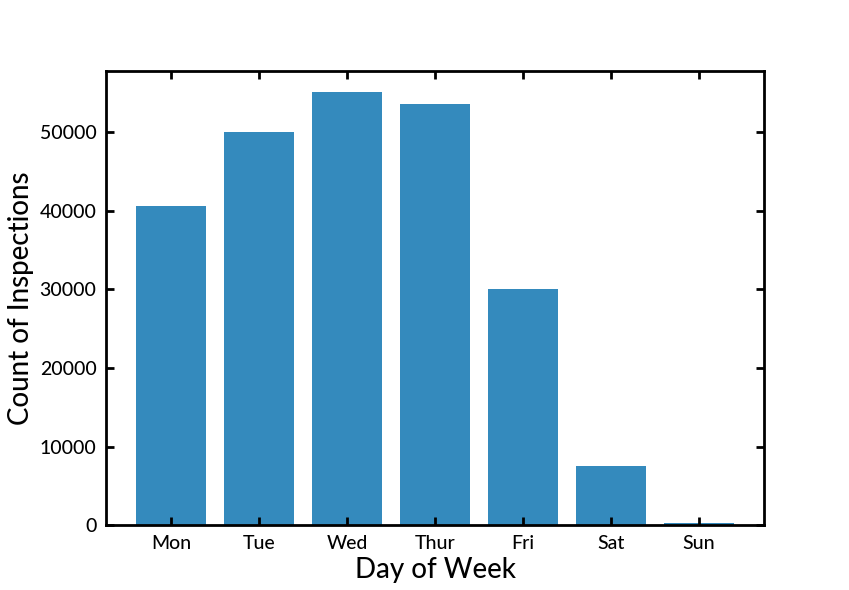

In [82]:
day_hist = pd.to_datetime(df["inspection_date"]).dt.weekday
day_hist = day_hist.value_counts().sort_index()
day_hist.index = ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"]
plt.bar(day_hist.index, day_hist.values)
plt.xlabel("Day of Week")
plt.ylabel("Count of Inspections")
plt.show()

In [88]:
threeoneone = pd.read_csv('./data/311.csv')

In [89]:
threeoneone.describe()

,incident_zip,latitude,longitude
count,271668.000000,267308.000000,267308.000000
mean,10803.823906,40.722135,-73.931015
std,649.423435,0.081410,0.086684
min,0.000000,40.498949,-74.254644
25%,10301.000000,40.668698,-73.980561
50%,11205.000000,40.717870,-73.938696
75%,11235.000000,40.773553,-73.881111
max,105457.000000,40.912869,-73.700384


In [90]:
threeoneone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 12 columns):
created_date      300000 non-null object
agency            300000 non-null object
complaint_type    300000 non-null object
descriptor        299259 non-null object
incident_zip      271668 non-null float64
address_type      293070 non-null object
city              271867 non-null object
facility_type     45185 non-null object
borough           300000 non-null object
latitude          267308 non-null float64
longitude         267308 non-null float64
location_type     178067 non-null object
dtypes: float64(3), object(9)
memory usage: 27.5+ MB


<IPython.core.display.Javascript object>


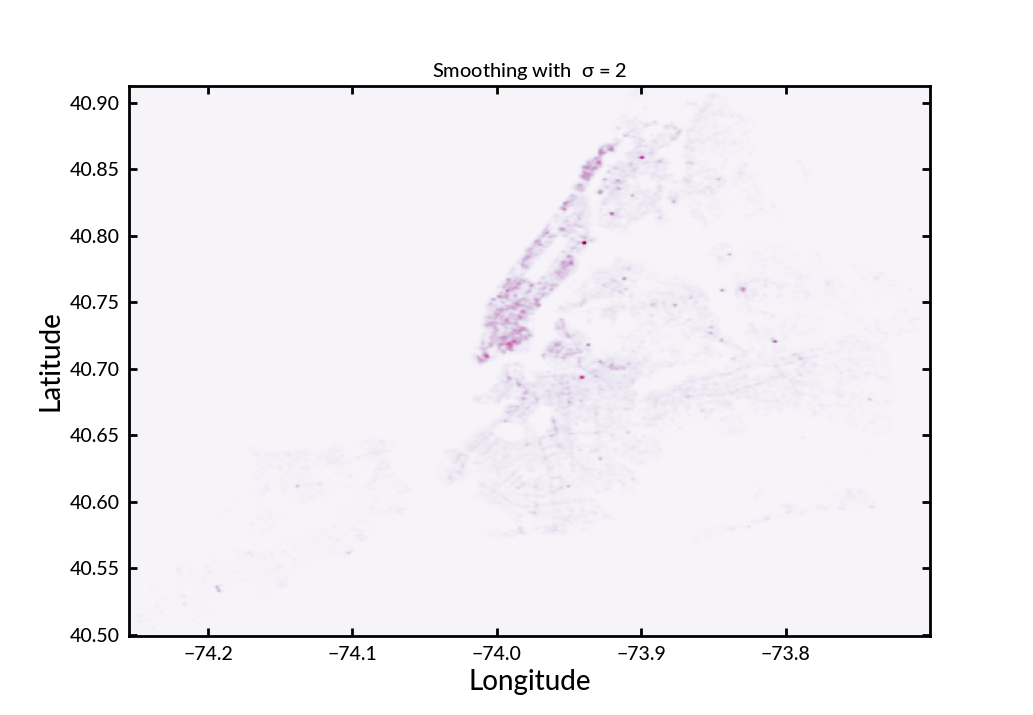

Text(0, 0.5, 'Latitude')

In [91]:
fig, ax = plt.subplots(1,1)

x = threeoneone.longitude
y = threeoneone.latitude

sigmas = 1
s = 2

img, extent, xedges, yedges = myplot(x, y, s)
ax.imshow(img, extent=extent, origin='lower', cmap=cm.PuRd)
ax.set_title("Smoothing with  $\sigma$ = %d" % s)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

In [98]:
threeoneone[threeoneone.agency == 'DSNY'].complaint_type.unique()

array(['Request Large Bulky Item Collection',
       'Missed Collection (All Materials)', 'Snow', 'Dirty Conditions',
       'Derelict Vehicles', 'Graffiti', 'Sanitation Condition',
       'Derelict Bicycle', 'Electronics Waste', 'Vacant Lot',
       'Other Enforcement', 'Litter Basket / Request', 'Sweeping/Missed',
       'Recycling Enforcement', 'Sweeping/Inadequate',
       'Electronics Waste Appointment', 'Request Xmas Tree Collection',
       'Overflowing Litter Baskets', 'Sweeping/Missed-Inadequate',
       'Collection Truck Noise', 'Adopt-A-Basket',
       'Overflowing Recycling Baskets'], dtype=object)

In [99]:
threeoneone[threeoneone.agency == 'DEP'].complaint_type.unique()

array(['Sewer', 'Hazardous Materials', 'Air Quality', 'Water System',
       'Industrial Waste', 'Water Conservation', 'Noise', 'FATF', 'Lead',
       'Asbestos', 'Plant', 'FCST', 'ATF', 'Water Quality', 'SRDE'],
      dtype=object)

In [101]:
threeoneone[threeoneone.agency == 'DOHMH'].complaint_type.unique()

array(['Mobile Food Vendor', 'Food Establishment', 'Unleashed Dog',
       'Smoking', 'Illegal Animal Sold', 'Mosquitoes', 'Tattooing',
       'Poison Ivy', 'Illegal Animal Kept as Pet', 'Trans Fat',
       'Pet Shop', 'Day Care', 'Unlicensed Dog',
       'Animal Facility - No Permit', 'Unsanitary Animal Facility',
       'Window Guard', 'Calorie Labeling', 'Indoor Air Quality',
       'Unsanitary Animal Pvt Property', 'Rodent', 'Standing Water',
       'Indoor Sewage', 'Drinking Water', 'Tanning', 'Bottled Water',
       'Beach/Pool/Sauna Complaint', 'X-Ray Machine/Equipment',
       'Harboring Bees/Wasps', 'Lifeguard', 'Non-Residential Heat',
       'Food Poisoning', 'Unsanitary Pigeon Condition', 'Asbestos',
       'Forms', 'Mold', 'Radioactive Material', 'Cooling Tower',
       'Asbestos/Garbage Nuisance'], dtype=object)

In [100]:
threeoneone.agency

0           DEP
1           DEP
2          DSNY
3           DEP
4           DEP
          ...  
299995     DSNY
299996     DSNY
299997    DOHMH
299998     DSNY
299999     DSNY
Name: agency, Length: 300000, dtype: object

In [145]:
nypd = pd.read_csv('./data/nypd.csv')

In [154]:
nypd.dropna(inplace=True)

In [146]:
nypd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 8 columns):
complaint_date           300000 non-null object
complaint_code           300000 non-null int64
complaint_description    299967 non-null object
offense_lvl              300000 non-null object
boro                     299785 non-null object
premisis_type            298870 non-null object
latitude                 299783 non-null float64
longitude                299783 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 18.3+ MB


In [149]:
nypd.complaint_code.unique()

array([109, 104, 233, 578, 344, 110, 106, 351, 361, 348, 117, 112, 341,
       126, 118, 235, 347, 105, 352, 107, 121, 236, 359, 113, 340, 116,
       114, 364, 125, 675, 353, 342, 358, 355, 343, 678, 120, 111, 115,
       231, 365, 345, 101, 232, 572, 350, 238, 363, 354, 124, 346, 230,
       677, 685, 676, 356, 103, 237, 349, 455, 571, 122, 366])

In [150]:
nypd.complaint_description.unique()

array(['GRAND LARCENY', 'RAPE', 'SEX CRIMES', 'HARRASSMENT 2',
       'ASSAULT 3 & RELATED OFFENSES', 'GRAND LARCENY OF MOTOR VEHICLE',
       'FELONY ASSAULT', 'CRIMINAL MISCHIEF & RELATED OF',
       'OFF. AGNST PUB ORD SENSBLTY &', 'VEHICLE AND TRAFFIC LAWS',
       'DANGEROUS DRUGS', 'THEFT-FRAUD', 'PETIT LARCENY',
       'MISCELLANEOUS PENAL LAW', 'DANGEROUS WEAPONS',
       'INTOXICATED & IMPAIRED DRIVING', 'ROBBERY', 'CRIMINAL TRESPASS',
       'BURGLARY', 'OFFENSES AGAINST PUBLIC ADMINI', 'FORGERY', 'FRAUDS',
       'ARSON', 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
       'NYS LAWS-UNCLASSIFIED FELONY', 'ADMINISTRATIVE CODE',
       'UNAUTHORIZED USE OF A VEHICLE', 'PETIT LARCENY OF MOTOR VEHICLE',
       'OFFENSES INVOLVING FRAUD', 'OFFENSES AGAINST THE PERSON',
       'OTHER OFFENSES RELATED TO THEF', 'ENDAN WELFARE INCOMP',
       'POSSESSION OF STOLEN PROPERTY', 'PROSTITUTION & RELATED OFFENSES',
       "BURGLAR'S TOOLS", 'MURDER & NON-NEGL. MANSLAUGHTER',
       'THEFT OF S

In [158]:
searchfor =  ['BURGLARY', 'PETIT LARCENY']

nypd[nypd.complaint_description.str.contains('|'.join(searchfor))]

,complaint_date,complaint_code,complaint_description,offense_lvl,boro,premisis_type,latitude,longitude
30,2016-01-01T00:00:00.000,341,PETIT LARCENY,MISDEMEANOR,QUEENS,GYM/FITNESS FACILITY,40.706781,-73.791130
45,2016-01-01T00:00:00.000,341,PETIT LARCENY,MISDEMEANOR,QUEENS,RESIDENCE - APT. HOUSE,40.712886,-73.817173
64,2016-01-01T00:00:00.000,341,PETIT LARCENY,MISDEMEANOR,BROOKLYN,RESIDENCE - APT. HOUSE,40.648088,-74.019775
77,2016-01-01T00:00:00.000,107,BURGLARY,FELONY,BRONX,RESIDENCE - APT. HOUSE,40.835985,-73.917053
84,2016-01-01T00:00:00.000,341,PETIT LARCENY,MISDEMEANOR,BROOKLYN,STREET,40.651065,-74.011116
...,...,...,...,...,...,...,...,...
299987,2016-08-16T00:00:00.000,341,PETIT LARCENY,MISDEMEANOR,MANHATTAN,DRUG STORE,40.703825,-74.013151
299990,2016-08-16T00:00:00.000,341,PETIT LARCENY,MISDEMEANOR,BROOKLYN,DRUG STORE,40.602633,-73.994953
299991,2016-08-16T00:00:00.000,341,PETIT LARCENY,MISDEMEANOR,MANHATTAN,STREET,40.720977,-73.994839
299994,2016-08-16T00:00:00.000,341,PETIT LARCENY,MISDEMEANOR,BROOKLYN,RESIDENCE - APT. HOUSE,40.644802,-74.005270


In [160]:
nypd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298617 entries, 0 to 299999
Data columns (total 8 columns):
complaint_date           298617 non-null object
complaint_code           298617 non-null int64
complaint_description    298617 non-null object
offense_lvl              298617 non-null object
boro                     298617 non-null object
premisis_type            298617 non-null object
latitude                 298617 non-null float64
longitude                298617 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 20.5+ MB
